In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl


from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.feature_selection import VarianceThreshold, SelectKBest

import functions
import pathlib
import os
import sys

In [2]:
# Custom functions
import pathlib
import os
import sys

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/voting', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/alexander/.local/lib/python3.7/site-packages/IPython/extensions', '/home/alexander/.ipython', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1']


In [3]:
datapath_train = get_data_path("Congressional_Voting", "CongressionalVotingID.shuf.lrn.csv")
display(datapath_train)
datapath_test = get_data_path("Congressional_Voting", "CongressionalVotingID.shuf.tes.csv")
display(datapath_test)
datapath_examp = get_data_path("Congressional_Voting", "CongressionalVotingID.shuf.sol.ex.csv")
display(datapath_test)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Congressional_Voting/CongressionalVotingID.shuf.lrn.csv')

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Congressional_Voting/CongressionalVotingID.shuf.tes.csv')

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Congressional_Voting/CongressionalVotingID.shuf.tes.csv')

# Data exploration
Data consinst out of of class for the classification and the instances are mostly "y,n,unknown".

In [4]:
df_train = pd.read_csv(datapath_train).drop("ID",axis = 1)
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)

df_train = df_train.rename(columns={"class": "Class"})
df_train

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,democrat,y,n,y,n,n,n,unknown,y,y,unknown,n,n,n,n,y,unknown
1,democrat,y,y,y,n,n,n,y,y,unknown,n,y,n,n,n,y,unknown
2,democrat,unknown,unknown,unknown,n,n,n,y,y,y,y,n,n,y,n,y,y
3,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
4,democrat,n,y,y,n,n,n,y,y,y,y,n,n,n,n,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,unknown
214,republican,n,n,n,y,y,y,n,n,n,n,n,y,y,y,y,n
215,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
216,republican,y,n,y,y,y,y,y,y,n,y,y,y,n,y,y,y


In [5]:
num_samples, num_features = df_train.shape
num_features -= 2 # class and id aren't features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class                                   218 non-null    object
 1   handicapped-infants                     218 non-null    object
 2   water-project-cost-sharing              218 non-null    object
 3   adoption-of-the-budget-resolution       218 non-null    object
 4   physician-fee-freeze                    218 non-null    object
 5   el-salvador-aid                         218 non-null    object
 6   religious-groups-in-schools             218 non-null    object
 7   anti-satellite-test-ban                 218 non-null    object
 8   aid-to-nicaraguan-contras               218 non-null    object
 9   mx-missile                              218 non-null    object
 10  immigration                             218 non-null    object
 11  synfue

In [6]:
# Count occurence of M/B
count_classes = df_train["Class"].value_counts()
count_classes

democrat      135
republican     83
Name: Class, dtype: int64

In [7]:
dist_classes = count_classes.apply(lambda x: x/num_samples)
dist_classes

democrat      0.619266
republican    0.380734
Name: Class, dtype: float64

## Features:

n... no

y... yes

unknown

We will later also use the mapping/encoding:

$unknown \rightarrow 0$

$n \rightarrow -1$

$y \rightarrow 1$

# Data preparation

In [8]:
df_train = df_train.replace("n",-1)
df_train = df_train.replace("y",1)
df_train = df_train.replace("unknown",0)


df_test = df_test.replace("n",-1)
df_test = df_test.replace("y",1)
df_test = df_test.replace("unknown",0)

## Plot histograms:

In [16]:
def PlotHist(df, xaxis,xlabel,ylabel,title,savename,bins):
    plt.rcParams.update({'font.size': 12})
    mpl.style.use('seaborn')
    fig = plt.figure(figsize=(6,5))
    plt.hist(df,bins = bins)
    plt.suptitle(title, fontsize=14, weight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
     


In [21]:
PlotHist(df_train,"index","Class","p","Distribution of classes","class_dist.png",3)

TypeError: 'value' must be an instance of str or bytes, not a int

In [20]:
dist_classes

democrat      0.619266
republican    0.380734
Name: Class, dtype: float64

In [ ]:
# Colors
sns_cols = sns.color_palette()
snsblue, snsgreen = sns_cols[0], sns_cols[1]
plt.rcParams.update({'font.size': 12})
mpl.style.use('seaborn')
fig = plt.figure(figsize=(6,6))
plt.bar(dist_classes.index, dist_classes, color=[snsgreen, snsblue])
plt.suptitle("Distribution of classes", fontsize=14, weight="bold")
plt.ylim((0,1))
plt.ylabel("p")
plt.xlabel("Class")

entropy = -sum([p*log2(p) for p in dist_classes])
plt.annotate(f"Entropy= {entropy:.3f}", (0.2, 0.8), fontweight="bold")

plt.savefig("class_dist.png")

## Plot correlation heatmaps:

In [22]:
def plot_corr_heatmap(df, fmt=".2f", feat_to_ret="Class", ticksfont=12,abs = True):
    df = df.replace("republican",0)
    df = df.replace("democrat",1)
    plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})
    # Compute correlations and save in matrix
    if abs:
        corr = np.abs(df.corr()) # We only used absolute values for visualization purposes! ..."hot-cold" view to just sort between 
    else:
        corr = df.corr()

    # Mask the repeated values --> here: upper triangle

    #print(corr)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True # mask upper triangle

    corr_to_feat = corr.loc[:,feat_to_ret]
    
    f, ax = plt.subplots(figsize=(18, 16))
    sns.heatmap(corr, annot=True, fmt=fmt , mask=mask, vmin=0, vmax=1, linewidths=.5,cmap="YlGnBu")
    plt.tick_params(labelsize=ticksfont)
    return corr_to_feat

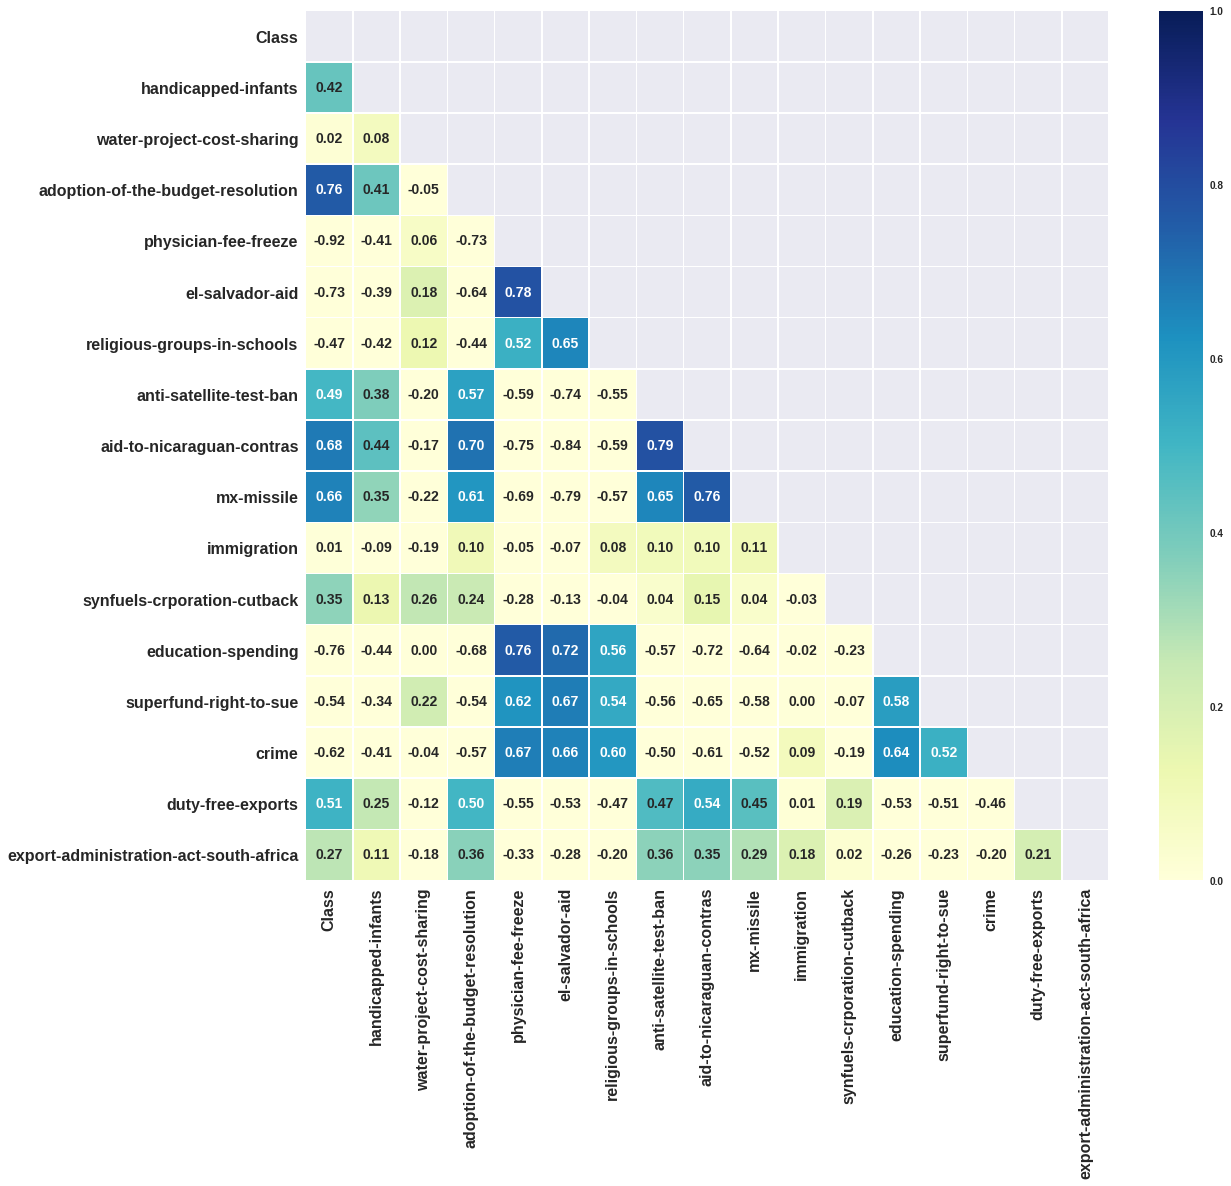

In [23]:
corr_to_class_stripped = functions.plot_corr_heatmap(df_train, ticksfont=16,abs = False)

In [24]:
red_corr_list = functions.Red_corr_list(corr_to_class_stripped,0.4)
red_corr_list

['water-project-cost-sharing',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'immigration',
 'synfuels-crporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'export-administration-act-south-africa']

In [26]:
df_train_red = df_train.drop(red_corr_list,axis = 1)

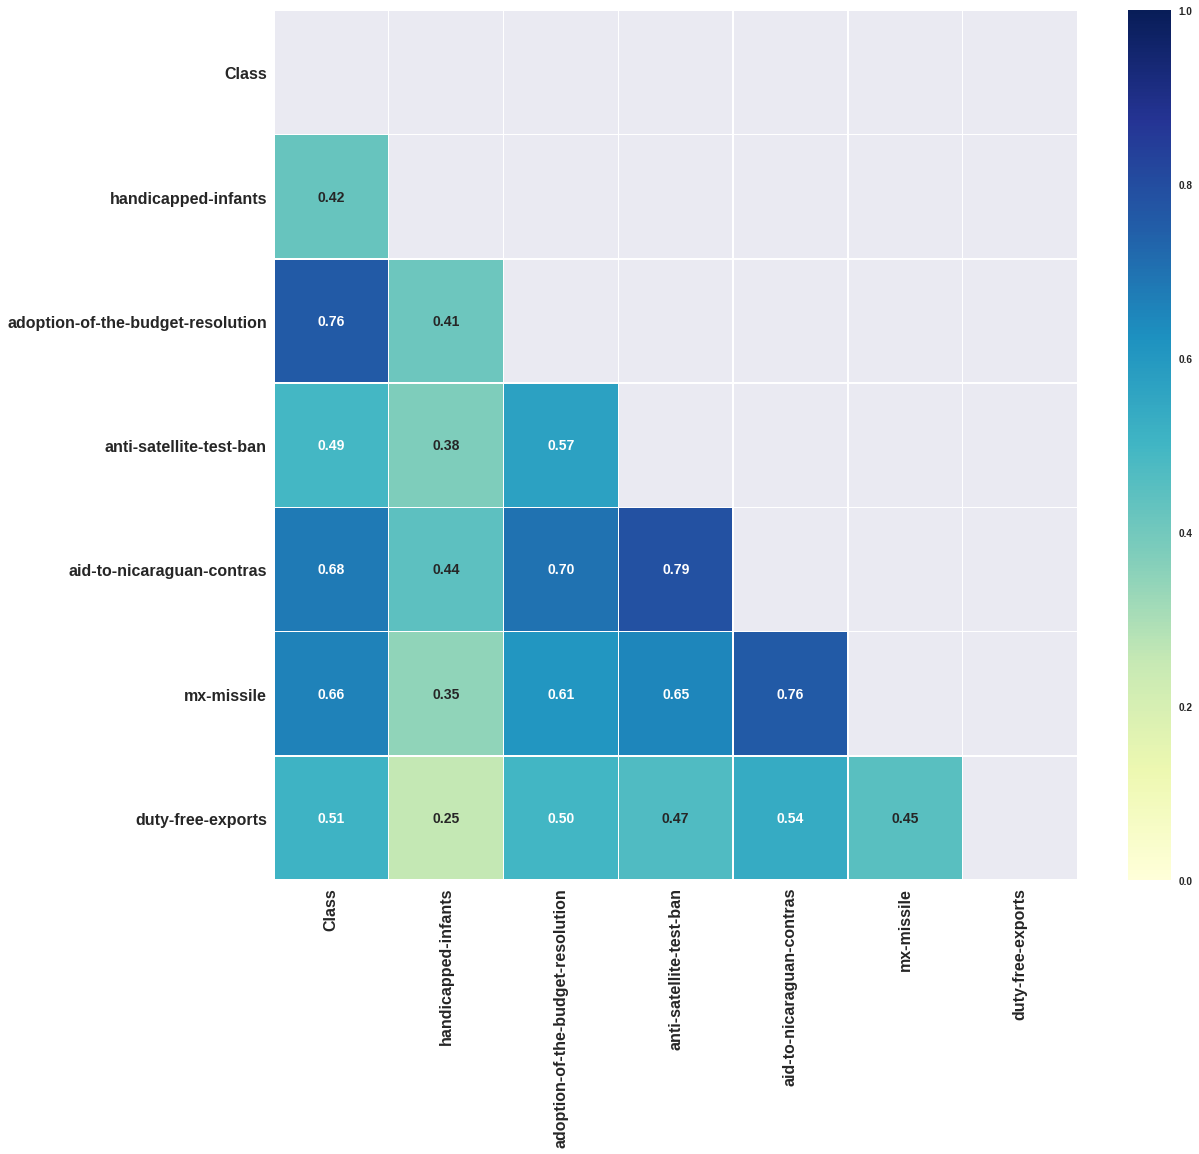

In [27]:
corr_to_class_stripped = functions.plot_corr_heatmap(df_train_red, ticksfont=16)

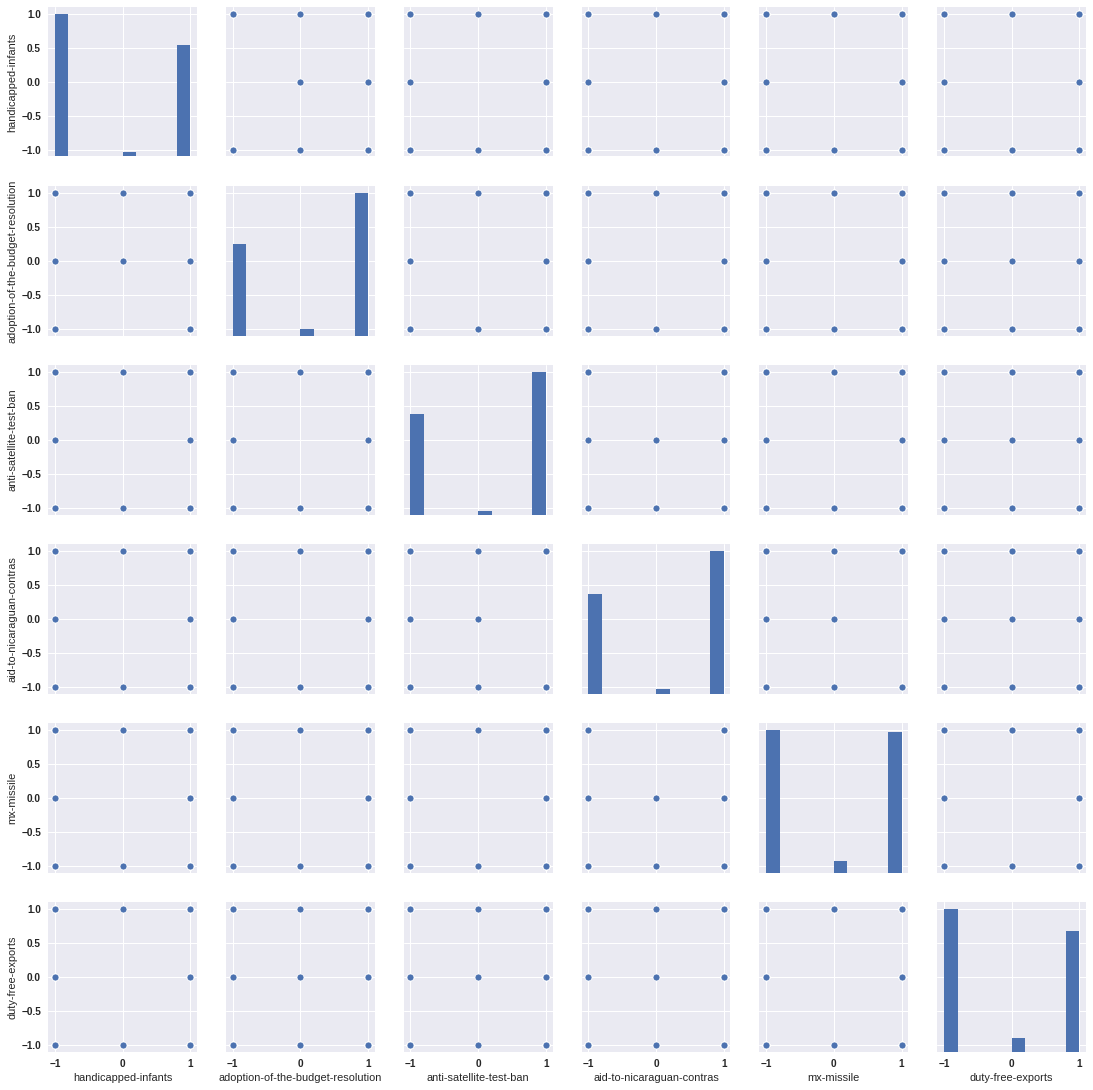

In [28]:
sns.pairplot(df_train_red)

In [29]:
df_train_red

,Class,handicapped-infants,adoption-of-the-budget-resolution,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,duty-free-exports
0,democrat,1,1,0,1,1,1
1,democrat,1,1,1,1,0,1
2,democrat,0,0,1,1,1,1
3,democrat,1,1,1,1,1,-1
4,democrat,-1,1,1,1,1,1
...,...,...,...,...,...,...,...
213,democrat,1,1,1,1,1,1
214,republican,-1,-1,-1,-1,-1,1
215,democrat,1,1,1,1,1,1
216,republican,1,1,1,1,-1,1


# handel missing values (unknown)